<a href="https://colab.research.google.com/github/pratibhaGogi/hello/blob/master/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd
import io
Data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
print(Data.head(20))

    age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0    63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1    37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2    41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3    56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4    57    0   0       120   354    0  ...      1      0.6      2   0     2       1
5    57    1   0       140   192    0  ...      0      0.4      1   0     1       1
6    56    0   1       140   294    0  ...      0      1.3      1   0     2       1
7    44    1   1       120   263    0  ...      0      0.0      2   0     3       1
8    52    1   2       172   199    1  ...      0      0.5      2   0     3       1
9    57    1   2       150   168    0  ...      0      1.6      2   0     2       1
10   54    1   0       140   239    0  ...      0      1.2      2   0     2 

In [3]:
Data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

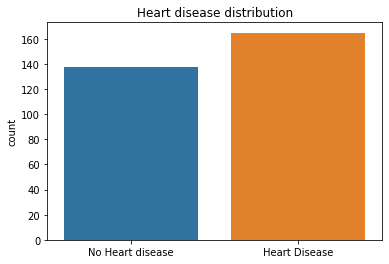

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

f = sns.countplot(x='target', data=Data)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");


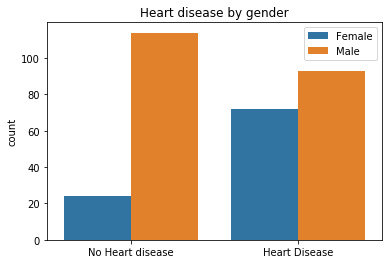

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
f = sns.countplot(x='target', data=Data, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
hdata= np.column_stack([Data['age'],Data['sex'],Data['cp'],Data['trestbps'],Data['chol'],Data['fbs'],Data['restecg'],Data['thalach'],Data['exang'],Data['oldpeak'],Data['slope'],Data['ca'],Data['thal']])
X_train,X_test,y_train,y_test = train_test_split(hdata,Data['target'],test_size=0.30,random_state=0)
print("X train Shape",X_train.shape)
print("Y train Shape ",y_train.shape)
print("X Test",X_test.shape)
print("Y Test",y_test.shape)

X train Shape (212, 13)
Y train Shape  (212,)
X Test (91, 13)
Y Test (91,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
X_new=np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
print("X_new.shape:",X_new.shape)
prediction=knn.predict(X_new)
print("Prediction",prediction)

y_pred= knn.predict(X_test)
print("Test set prediction",y_pred)
print("TEST SCORE", format(np.mean(y_pred==y_test)))
#sns.pairplot(heart_data, hue='target')
#plt.show()



actual = y_test
predicted = y_pred
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print (classification_report(actual, predicted))

X_new.shape: (1, 13)
Prediction [1]
Test set prediction [0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1]
TEST SCORE 0.5494505494505495
Confusion Matrix :
[[19 25]
 [16 31]]
Accuracy Score : 0.5494505494505495
Report : 
              precision    recall  f1-score   support

           0       0.54      0.43      0.48        44
           1       0.55      0.66      0.60        47

    accuracy                           0.55        91
   macro avg       0.55      0.55      0.54        91
weighted avg       0.55      0.55      0.54        91

